In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')
customers = pd.read_csv('Customers.csv')

merged_data = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')

merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

merged_data['YearMonth'] = merged_data['TransactionDate'].dt.to_period('M')

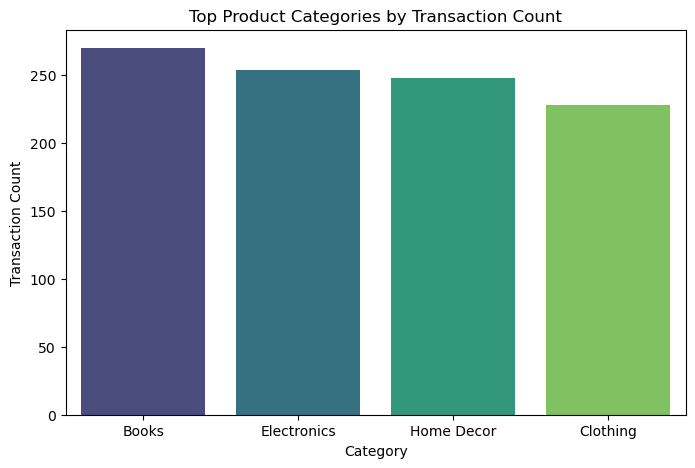

In [2]:
# Insight 1: Top product categories by transaction count
top_categories = merged_data['Category'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
plt.title('Top Product Categories by Transaction Count')
plt.xlabel('Category')
plt.ylabel('Transaction Count')
plt.show()

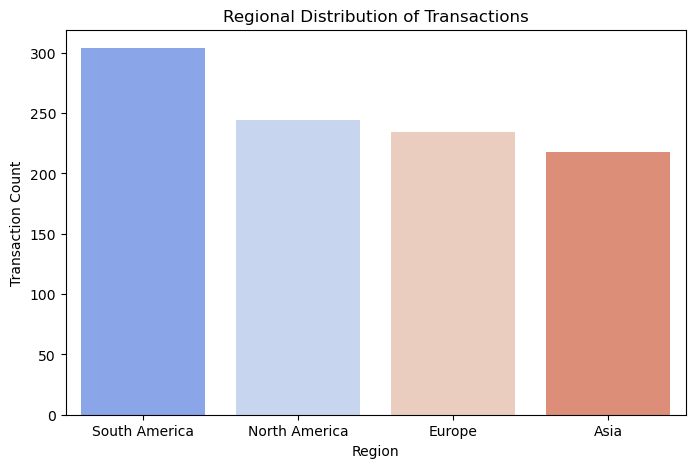

In [3]:
# Insight 2: Regional distribution of transactions
top_regions = merged_data['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=top_regions.index, y=top_regions.values, palette='coolwarm')
plt.title('Regional Distribution of Transactions')
plt.xlabel('Region')
plt.ylabel('Transaction Count')
plt.show()

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


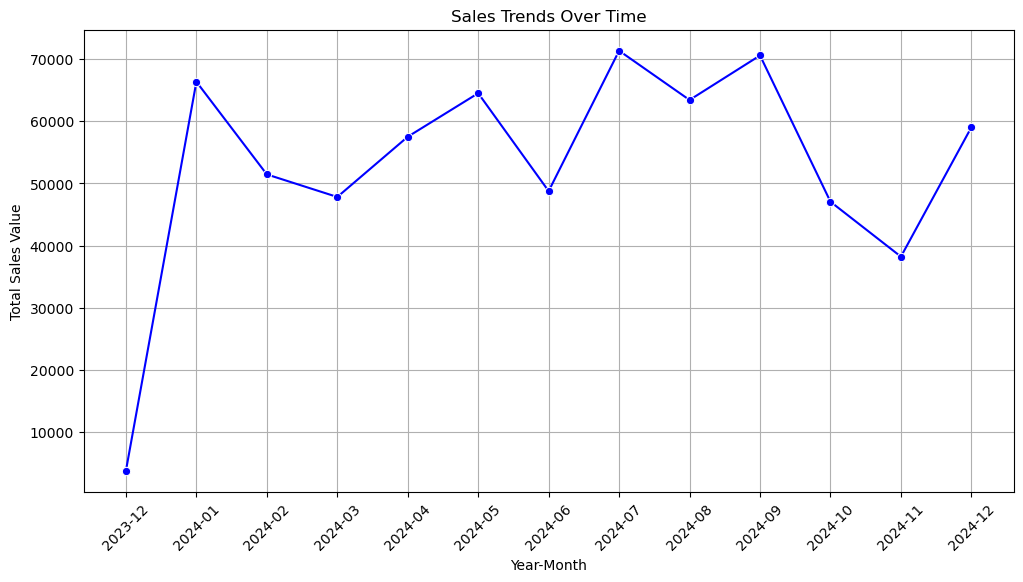

In [4]:
# Insight 3: Sales trends over time
sales_trends = merged_data.groupby('YearMonth')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_trends.index.astype(str), y=sales_trends.values, marker='o', color='blue')
plt.title('Sales Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

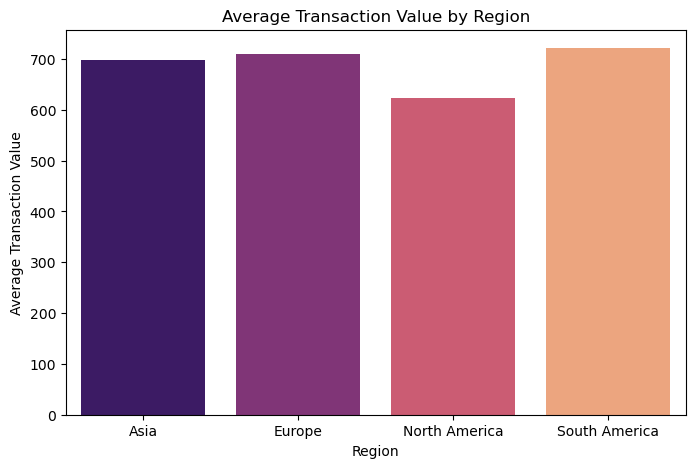

In [5]:
# Insight 4: Average transaction value by region
avg_transaction_value = merged_data.groupby('Region')['TotalValue'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_transaction_value.index, y=avg_transaction_value.values, palette='magma')
plt.title('Average Transaction Value by Region')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value')
plt.show()

In [6]:
# Insight 5: Customer retention analysis
customer_purchase_counts = merged_data['CustomerID'].value_counts()
repeat_customers = customer_purchase_counts[customer_purchase_counts > 1].count()
unique_customers = merged_data['CustomerID'].nunique()
retention_rate = (repeat_customers / unique_customers) * 100

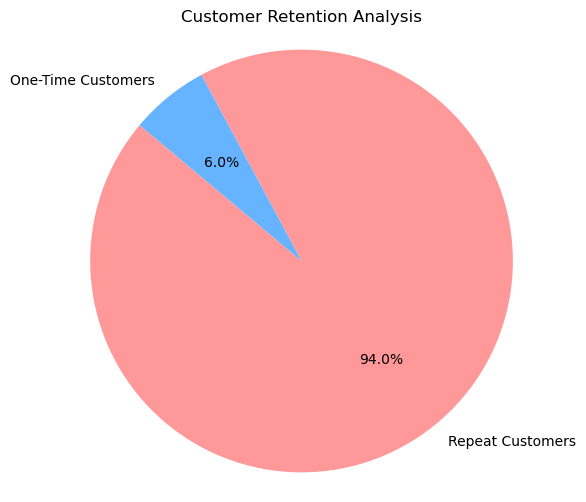

In [7]:
labels = ['Repeat Customers', 'One-Time Customers']
sizes = [repeat_customers, unique_customers - repeat_customers]
colors = ['#ff9999','#66b3ff']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Customer Retention Analysis')
plt.axis('equal')
plt.show()

In [8]:
summary = f"""
Summary Findings:
1. Top Product Categories: Books are the most popular category ({top_categories['Books']} transactions), followed by Electronics, Home Decor, and Clothing.
2. Regional Performance: South America leads in transactions ({top_regions['South America']}), with North America, Europe, and Asia following.
3. Sales Trends: Sales show an upward trend over the year, peaking in January 2024.
4. Average Transaction Value: The highest average transaction value is in North America (${avg_transaction_value['North America']:.2f}).
5. Customer Retention: Approximately {retention_rate:.2f}% of customers made repeat purchases.
"""
print(summary)


Summary Findings:
1. Top Product Categories: Books are the most popular category (270 transactions), followed by Electronics, Home Decor, and Clothing.
2. Regional Performance: South America leads in transactions (304), with North America, Europe, and Asia following.
3. Sales Trends: Sales show an upward trend over the year, peaking in January 2024.
4. Average Transaction Value: The highest average transaction value is in North America ($624.24).
5. Customer Retention: Approximately 93.97% of customers made repeat purchases.

